# Brown Dwarfs, How do They Work?

Benjamin Pennell

November 27th, 2025

Max Planck Institut für Astronomie, Heidelberg

---

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from astropy.table import Table
import pickle
import pandas as pd

## The real catalogue

In [3]:
mdwarfs = Table.read('./data/all_nearby_mdwarfs.fits', format='fits')

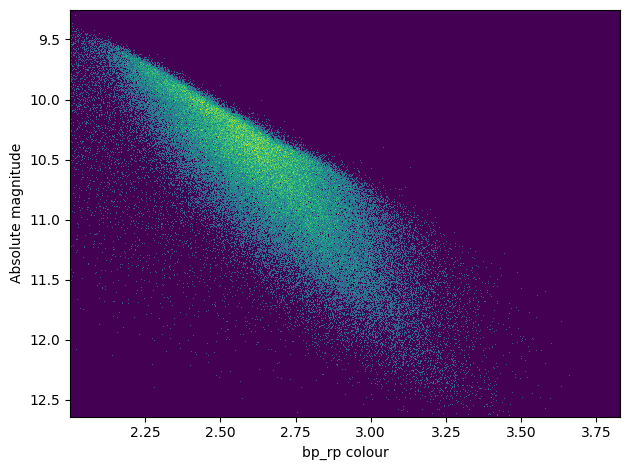

In [4]:
bp_rp = mdwarfs["bp_rp"]
parallax = mdwarfs["parallax"]
gmag = mdwarfs["phot_g_mean_mag"]
absolute_magnitudes = gmag + 5 * np.log10(parallax) - 10

plt.hist2d(bp_rp, absolute_magnitudes, bins=1000, norm=matplotlib.colors.PowerNorm(0.4));
plt.ylabel("Absolute magnitude");
plt.xlabel("bp_rp colour");
plt.ylim(bottom=np.max(absolute_magnitudes), top=np.min(absolute_magnitudes));
plt.xlim([np.min(bp_rp), np.max(bp_rp)]);
plt.tight_layout()

In [ ]:
rates = [len(mdwarfs[mdwarfs["solution_type"] == soltype])/len(mdwarfs)*100 for soltype in [0,5,7,9,12]]
grid = [
    rates,
    [int(grp/100*len(mdwarfs)) for grp in rates]
]
row_labels = ["Rate (%)", "Counts"]
col_labels = ["low RUWE", "high RUWE", "Acceleration", "Jerk", "Full Orbit"]
pd.DataFrame(grid, index=row_labels, columns=col_labels)

,low RUWE,high RUWE,Acceleration,Jerk,Full Orbit
Rate (%),95.668024,4.197158,0.076308,0.018617,0.039893
Counts,467632.000000,20516.000000,373.000000,91.000000,195.000000


## The cube

In [6]:
imported_cube = pickle.load(open("./data/2025-12-02_mdwarf_circular_3plx.pkl", "rb"))

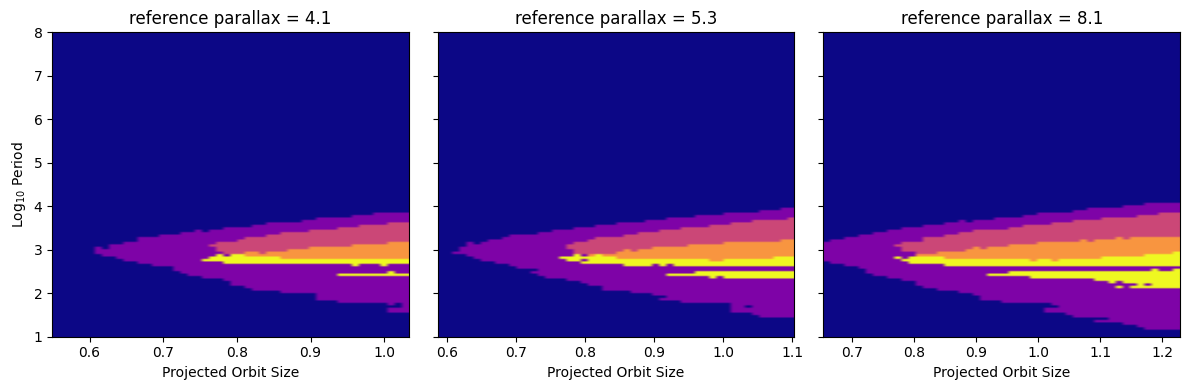

In [8]:
fig, axs = plt.subplots(1,3, figsize=(12,4), sharey=True);
plxs = list(imported_cube["cube"].keys())
axs[0].set_ylabel(r"$\text{Log}_{10}$ Period");
for i, ax in enumerate(axs):
    lams = imported_cube["meta"]["lambdas"][i]**(1/4)
    xrange = np.array((lams[0], lams[-1]))
    logps = np.log10(imported_cube["meta"]["periods"])
    yrange = (logps[-1], logps[0])
    extent = [*xrange, *yrange]
    extent = [float(e) for e in extent]

    colorcube = np.argmax(imported_cube["data"][plxs[i]], axis=2)
    ax.imshow(colorcube, extent=extent, aspect="auto", cmap="plasma");
    ax.invert_yaxis()
    ax.set_xlabel("Projected Orbit Size");
    ax.set_title("reference parallax = {:.1f}".format(plxs[i]))
fig.tight_layout()

## A test of synthetic data

## A test of real data